# Import Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

# Import Data

In [92]:
# df = pd.read_csv('data/data_extraction/covid19_indonesia.csv')
df = pd.read_csv('omicron.csv')

In [93]:
df.head(10)

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/noturfavgerl/status/1562274507465039873,2022-08-24,Semoga g omicron ya Tuhan,Semoga g omicron ya Tuhan,1562274507465039873,"{'username': 'noturfavgerl', 'id': 720864294426902528, 'displayname': ""zoro's wife"", 'descriptio...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://twitter.com/SandalJ33651908/status/1562261673603239936,2022-08-24,"@dinagustavsson Ada delta,omicron ,cacar munyuk,sampe HIV....\nSEMUANYA AKIBAT VAX C19...\nBERUN...","@dinagustavsson Ada delta,omicron ,cacar munyuk,sampe HIV....\nSEMUANYA AKIBAT VAX C19...\nBERUN...",1562261673603239936,"{'username': 'SandalJ33651908', 'id': 1376897043075981315, 'displayname': 'PAK DHE', 'descriptio...",0,0,1,...,NaN,NaN,NaN,1.562260e+18,"{'username': 'dinagustavsson', 'id': 1530790391049441280, 'displayname': 'Dina NataliaLee', 'des...","[{'username': 'dinagustavsson', 'id': 1530790391049441280, 'displayname': 'Dina NataliaLee', 'de...",NaN,NaN,NaN,NaN
2,2,https://twitter.com/garuda080/status/1562243666017923072,2022-08-24,Ayo sukseskan vaksinasi Covid-19 dengan melakukan vaksin dosis lengkap agar terhindar dari penul...,Ayo sukseskan vaksinasi Covid-19 dengan melakukan vaksin dosis lengkap agar terhindar dari penul...,1562243666017923072,"{'username': 'garuda080', 'id': 128641833, 'displayname': 'Tukangkuli', 'description': 'hanya or...",3,13,15,...,"[{'previewUrl': 'https://pbs.twimg.com/media/Fa40VLXacAAssWA?format=jpg&name=small', 'fullUrl': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['TetapProkesLengkapiVaksin', 'IndonesiaSemakinHebat']",NaN
3,3,https://twitter.com/galerifitri/status/1562243395837644801,2022-08-24,"Agar terhindar dr varian baru omicron BA.4 &amp; BA.5, masyarakat dihimbau melakukan vaksinasi c...","Agar terhindar dr varian baru omicron BA.4 &amp; BA.5, masyarakat dihimbau melakukan vaksinasi c...",1562243395837644801,"{'username': 'galerifitri', 'id': 577026915, 'displayname': '👑', 'description': 'taishin-miyamot...",4,11,12,...,"[{'previewUrl': 'https://pbs.twimg.com/media/Fa40EoNaIAEsBjl?format=jpg&name=small', 'fullUrl': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['TetapProkesLengkapiVaksin', 'IndonesiaSemakinHebat']",NaN
4,4,https://twitter.com/erny_siswati/status/1562227603741614080,2022-08-23,"Ambil baik nya, pas kenapa omicron, pertama bisa buat account tik tok haha Dan tik tok an.. than...","Ambil baik nya, pas kenapa omicron, pertama bisa buat account tik tok haha Dan tik tok an.. than...",1562227603741614080,"{'username': 'erny_siswati', 'id': 608912929, 'displayname': 'Erny 🍄🍀', 'description': 'All hv a...",1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['gaptekdotcom'],NaN
5,5,https://twitter.com/artsynay/status/1562120409406791681,2022-08-23,"Covid series yg omicron udah lenyap kan ya? Masa ini rasanya kayak omicron gejalanya, sakit nyer...","Covid series yg omicron udah lenyap kan ya? Masa ini rasanya kayak omicron gejalanya, sakit nyer...",1562120409406791681,"{'username': 'artsynay', 'id': 902050829934452737, 'displayname': 'Nay 🌝 Commissions open', 'des...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,https://twitter.com/_theguzel/status/1562117285875449857,2022-08-23,@sitajir89 Di india udh ada lagi cacar tomat .. kmarin di eropa lagi rame cacar monyet dsini msh...,@sitajir89 Di india udh ada lagi cacar tomat .. kmarin di eropa lagi rame cacar monyet dsini msh...,1562117285875449857,"{'username': '_theguzel', 'id': 1417079987614588931, 'displayname': 'ค๓คrē ງนຊēl', 'description'...",1,0,1,...,NaN,NaN,NaN,1.562094e+18,"{'username': 'sitajir89', 'id': 874556526492499968, 'displayname': 'si Ahli Muda', 'description'...","[{'username': 'sitajir89', 'id': 874556526492499968, 'displayname': 'si Ahli Muda', 'description...",NaN,NaN,NaN,NaN
7,7,https://twitter.com/unsaintedperson/status/1562083858514051074,2022-08

In [94]:
len(df)

21054

Removing Duplicate if any

In [95]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [96]:
len(df)

21054

# Extra Cleaning

In [101]:
len(df[df['content'].isnull()==True])

0

In [102]:
pd.set_option('display.max_colwidth', None)
df[df['content'].isnull()==True]['content']

Series([], Name: content, dtype: object)

Removing Observation that the text become empty after cleaning, indicating that the text doesn't have significance sentiment

In [103]:
df = df.dropna(subset=['content'])
df = df.reset_index(drop=True)

In [104]:
df.isnull().sum()

Unnamed: 0              0
url                     0
date                    0
content                 0
renderedContent         0
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
outlinks            18949
tcooutlinks         18949
media               18414
retweetedTweet      21054
quotedTweet         19744
inReplyToTweetId    11040
inReplyToUser       11040
mentionedUsers      12399
coordinates         20458
place               20458
hashtags            19466
cashtags            21052
dtype: int64

In [107]:
clean_text = df['content'].copy()

In [108]:
pd.set_option('display.max_colwidth', 100)
clean_text.tail(15)

21039                              @rizkypranst Tai banget:(\nBisa sampe kena omicron gini aja rasanya emosi
21040                                       katanya omicron kok offline si masszeh 🧐 https://t.co/P1FnBDZnPz
21041                                                      @je_llyy @shitlicious Yuk ngobrolin omicron kawin
21042    @convomf Bilang aja nder gadiizinin keluar rumah sama orang tua soalnya sekarangkan omicron lagi...
21043                                                     @icaadhis omicron, jadi ga boleh tos. jaga jarak ❌
21044                       :(( habis denger kabarr temen, sesak banget katanya kalau udah kena omicron :(((
21045    @convomf wajar kok, mana sekarang kan omicron juga lumayan jd ya gpp sih daripada nekat ntar mal...
21046    Covid first wave lolos. Second wave lolos. Third wave positive. Padahal gak suka om om tp malah ...
21047                   8-gejala-omicron-paling-umum-pada-orang-yang-sudah-divaksin\nhttps://t.co/o6BKgUT0nF
21048              

In [109]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

Cleaning text that exaggerate the typing such as 'psbbbbbbbbb' 

In [110]:
clean_text_exag = clean_text.apply(lambda x: repair_exaggeration(x))

In [111]:
clean_text_exag.tail(15)

21039                           @ rizkypranst Tai banget : ( Bisa sampe kena omicron gini aja rasanya emosi 
21040                                    katanya omicron kok offline si masszeh 🧐 https : //t.co/P1FnBDZnPz 
21041                                                   @ je_llyy @ shitlicious Yuk ngobrolin omicron kawin 
21042    @ convomf Bilang aja nder gadiizinin keluar rumah sama orang tua soalnya sekarangkan omicron lag...
21043                                                 @ icaadhis omicron , jadi ga boleh tos . jaga jarak ❌ 
21044                : ( ( habis denger kabarr temen , sesak banget katanya kalau udah kena omicron : ( ( ( 
21045    @ convomf wajar kok , mana sekarang kan omicron juga lumayan jd ya gpp sih daripada nekat ntar m...
21046    Covid first wave lolos . Second wave lolos . Third wave positive . Padahal gak suka om om tp mal...
21047                 8-gejala-omicron-paling-umum-pada-orang-yang-sudah-divaksin https : //t.co/o6BKgUT0nF 
21048            @ 

Recleaning after remove exaggeration

In [112]:
re_clean = clean_text_exag.apply(lambda x: clean_tweets(x))

we use keywords for querying data, now we need to remove them as it will all found in every sentence in this data frame

In [113]:
keyword = ['psbb','psb','corona','covid19','indonesia','pemerintah','wfh','covid']
clean_text_extra = re_clean.apply(lambda x: del_word(x,keyword))

In [114]:
clean_text_extra.tail(15)

21039                                                        rizkypranst tai banget kena omicron gini emosi 
21040                                              katanya omicron offline si masszeh https t co p fnbdznpz 
21041                                                       je llyy shitlicious yuk ngobrolin omicron kawin 
21042    convomf bilang nder gadiizinin keluar rumah tua sekarangkan omicron lumayan naiknya alesannya ma...
21043                                                                    icaadhis omicron ga tos jaga jarak 
21044                                           habis denger kabarr teman sesak banget katanya kena omicron 
21045                                        convomf wajar kan omicron lumayan tidak apa-apa sih nekat kena 
21046                first wave lolos second wave lolos third wave positive tidak suka om om nempel omicron 
21047                                                  gejala omicron paling divaksin https t co o bkgut nf 
21048              

In [115]:
df['clean_text'] = clean_text_extra

In [116]:
df['word_length'] = df['clean_text'].apply(lambda x:count_words(x))

In [117]:
df['word_length'].value_counts().sort_index()

1       31
2      326
3      908
4     1224
5     1397
6     1425
7     1284
8     1249
9     1164
10    1146
11    1073
12     960
13     888
14     728
15     752
16     657
17     579
18     511
19     542
20     424
21     404
22     412
23     414
24     382
25     389
26     291
27     263
28     224
29     209
30     208
31     157
32     109
33      79
34      54
35      43
36      34
37      30
38      19
39      12
40      12
41      10
42       6
43       7
44       3
45       4
46       2
48       3
49       3
51       2
55       1
Name: word_length, dtype: int64

In [118]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

# Word Processing

## Create word dictionary

In [119]:
word_dict = {}
for i in range(0,len(df['clean_text'])):
    sentence = df['clean_text'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [120]:
len(word_dict)

40333

In [121]:
len({k:v for (k,v) in word_dict.items() if v < 4})

33663

## Import Lexicon data

import lexicon, and remove negation words from lexicon, the lexicon is a combination from several sources below, that combined together, and include swear words which has the most negative score

sources : <br>
https://github.com/louisowen6/NLP_bahasa_resources <br>
https://github.com/abhimantramb/elang/blob/master/word2vec/utils/swear-words.txt <br>
https://github.com/fajri91/InSet <br>
https://github.com/agusmakmun/SentiStrengthID/blob/master/id_dict/sentimentword.txt 

In [122]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [123]:
len(lexicon)

10248

In [124]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [125]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [126]:
len(lexicon_word)

10248

Checking if there is words in dictionary that does not included in the lexicon

In [127]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

34549

Let's take a look what kind of words they are, lets start with some words that have many occurences as this most likely not  a type case

In [128]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

4403

In [129]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

It turns out that the words that is not included in lexicon, are the one that not have signifance sentiment

In [130]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

omicron 22449
t 4976
co 4786
https 4773
tidak 3309
ga 2060
delta 1673
kasus 1475
deh 1400
vaksin 1377
ba 1320
virus 1275
gejala 1229
nya 1028
sih 919
booster 854
kan 795
prokes 713
masker 644
demam 611


In [131]:
word_to_plot = df['clean_text'].copy()

In [132]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

creating word cloud to see what kind of words that appear often in the tweets related to the pandemic

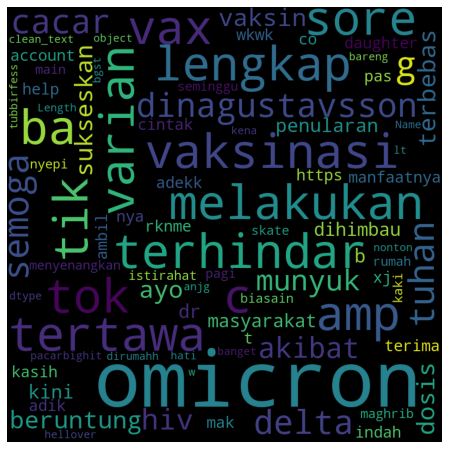

In [133]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## sentiment

In [134]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

calculating the sentiment of words by mathing them to the lexicon while also creating the bag of words matrix

In [137]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['clean_text'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [138]:
len(sentiment_list)

21054

In [139]:
print(senrow.shape[0])

21054


constructing the data frame that contain bag of words and the sentiments that have been calculated before

In [140]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [141]:
df_sen.head(10)

,moga,tuhan,akibat,beruntung,bebas,ayo,sukses,lengkap,terhindar,tular,...,ejakulasi,kunyah,hisap,eneng,monopoli,bertamu,berpasangan,domba,terbaring,sentiment
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,-4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-15
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-8
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


lets see if the sentiment is correct by looking at the original text

In [143]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['content'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [148]:
cek_df

,text,sentiment
0,Semoga g omicron ya Tuhan,4
1,"@dinagustavsson Ada delta,omicron ,cacar munyuk,sampe HIV....\nSEMUANYA AKIBAT VAX C19...\nBERUN...",1
2,Ayo sukseskan vaksinasi Covid-19 dengan melakukan vaksin dosis lengkap agar terhindar dari penul...,5
3,"Agar terhindar dr varian baru omicron BA.4 &amp; BA.5, masyarakat dihimbau melakukan vaksinasi c...",-4
4,"Ambil baik nya, pas kenapa omicron, pertama bisa buat account tik tok haha Dan tik tok an.. than...",14
...,...,...
21049,"Adekk cintak nggak selalu indah dek, omicron apalagi wkwk https://t.co/R5RknME5Xj",-3
21050,"hari ini menyenangkan,\npagi - sore: istirahat &amp; ""nyepi"" di rumah\nsore - maghrib: main skat...",-2
21051,"@pacarbighit dirumahh, yang nobar hati2 omicron lg tinggi banget &lt;3",6
21052,@helloverrrr W lg kena omicron haha,2


In [156]:
cek_df.to_csv('omicron_sentiment.csv')
cek_df.to_excel('omicron_sentiment.xlsx')

# EDA

Text(0.5, 0, 'sentiment')

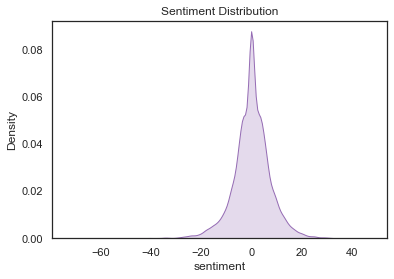

In [145]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<AxesSubplot:xlabel='sentiment'>

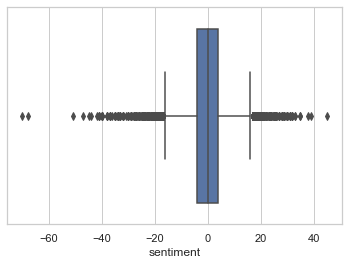

In [146]:
sns.set(style="whitegrid") 
sns.boxplot(x=df_sen['sentiment'])

It look like the sentiments are equally distributed between positive and negative, to be sure, lets take a look at the mean

In [147]:
df_sen.describe()

,moga,tuhan,akibat,beruntung,bebas,ayo,sukses,lengkap,terhindar,tular,...,ejakulasi,kunyah,hisap,eneng,monopoli,bertamu,berpasangan,domba,terbaring,sentiment
count,21054.000000,21054.000000,21054.00000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,...,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000,21054.000000
mean,0.025743,0.003087,0.00665,0.000570,0.005842,0.006270,0.001330,0.004797,0.003135,0.010497,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.136221
std,0.170504,0.057991,0.08358,0.023868,0.086158,0.081888,0.036445,0.071129,0.055903,0.102845,...,0.006892,0.006892,0.006892,0.006892,0.006892,0.006892,0.006892,0.006892,0.006892,7.507096
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,4.000000,2.000000,2.00000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000


now lets take a look at the most occured words among the set of words that is included in lexicon

In [151]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

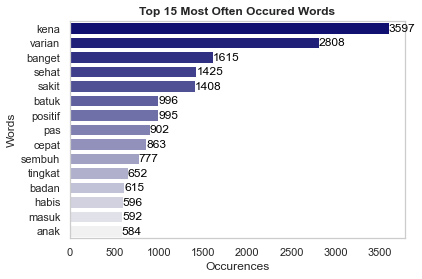

In [152]:
#pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()